<font face="微软雅黑" size=5 color=#A52A2A > Lesson 3 文件读取

# 路径和文件管理

+ 内置的 pathlib.Path 对象
+ 内置的 os.path 对象
+ 环境管理器 open
+ glob

### 操作路径: 推荐 pathlib.Path 
官方文档：https://docs.python.org/3/library/pathlib.html#basic-use

In [1]:
# 创建一个指向当前路径的Path对象
from pathlib import Path
root = Path(".") # “.”意味着：当前代码存在于的文件夹
root

WindowsPath('.')

In [2]:
# Listing subdirectories:
[x for x in root.iterdir() if x.is_dir()]

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('L03_documents'),
 WindowsPath('liutianyu'),
 WindowsPath('new_folder')]

In [3]:
#p = Path('E:/WPy64-3902/notebooks/hyt_class/L03_documents')
p = Path('./L03_documents')
p   # p是一个路径对象，可以用路径对象的方法去操作；不是字符串。

WindowsPath('L03_documents')

In [4]:
# 将路径对象转化为字符串
str(p)   #输出文件夹名字的字符串

'L03_documents'

In [29]:
[x for x in p.iterdir() if x.is_dir()]

[WindowsPath('L03_documents/.ipynb_checkpoints')]

In [5]:
# 查看当前工作目录
Path.cwd()

WindowsPath('E:/WPy64-3902/notebooks/hyt_class')

pathlib 支持用 / 拼接路径。

In [13]:
# 创建和删除文件夹
t = "new_folder1"
new_dir = root / t
#new_dir.mkdir("new_folder1")
new_dir.mkdir(10)
new_dir

WindowsPath('new_folder1')

In [15]:
Path(new_dir).mkdir()

In [16]:
new_dir.rmdir()

In [9]:
new_dir.mkdir??

Signature: new_dir.mkdir(mode=511, parents=False, exist_ok=False)
Source:   
    def mkdir(self, mode=0o777, parents=False, exist_ok=False):
        """
        Create a new directory at this given path.
        """
        try:
            self._accessor.mkdir(self, mode)
        except FileNotFoundError:
            if not parents or self.parent == self:
                raise
            self.parent.mkdir(parents=True, exist_ok=True)
            self.mkdir(mode, parents=False, exist_ok=exist_ok)
        except OSError:
            # Cannot rely on checking for EEXIST, since the operating system
            # could give priority to other errors like EACCES or EROFS
            if not exist_ok or not self.is_dir():
                raise
File:      e:\wpy64-3902\python-3.9.0.amd64\lib\pathlib.py
Type:      method


小练习：
+ 创建一串文件夹，命名为folder0~~folder9
+ 把这些文件夹批量删掉

In [29]:
# 练习答案
for i in range (10):    
    t = "folder" + str(i)
    new_dir = root / t 
    #new_dir.mkdir(0)
    new_dir.rmdir()


In [17]:
i = 1
str(i)

'1'

In [75]:
# 检查文件或文件夹是否存在
path_to_new_folder = root / "new_folder"
path_to_new_folder.exists()

True

### os模块
官方文档： https://docs.python.org/3/library/os.path.html

In [36]:
import os
os.mkdir("bbb")

In [39]:
os.rmdir('aaa')

### 绝对路径和相对路径

In [18]:
#默认相对路径
f = open("summer.txt", "w")
f.write("I wanna go back to campus.")
f.close()

In [20]:
path_summer = Path("summer.txt")
path_summer

WindowsPath('summer.txt')

In [21]:
# 获取绝对路径
path_summer.absolute()

WindowsPath('E:/WPy64-3902/notebooks/hyt_class/summer.txt')

In [82]:
path_to_new_folder.absolute()

WindowsPath('E:/WPy64-3902/notebooks/hyt_class/new_folder')

###  `open` 环境管理器的使用方法
+ 文件打开和写入
+ 文件内容读取

In [22]:
# 我们将向在当前文件夹中的名为“summer.txt”的文件写入数据

with open(path_summer, mode="w") as f:
    # 这里的缩进表示我们进入了打开文件的“环境”（context）中。
    # 离开这个缩进的空间将退出打开文件的环境，迫使该文件被关闭。
    # 就算我们在缩进中的代码导致错误，文件也将被关闭
    f.write('this is a line.\nThis is a second line.\nThis is the third line.\n')

# 文件再次被关闭。
# w表示写入文件内容，原内容被覆盖。

In [23]:
# 操作path
with path_summer.open(mode="a") as f:
    f.write('1 this is a line.\n2 This is a second line.\n3 This is the third line.\n')

##### 常见打开模式

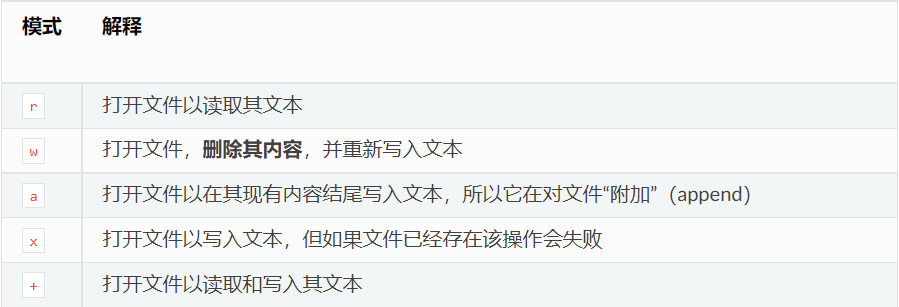

In [24]:
# 演示文件对象的 `read` 方法
# 打开文件要注意选用 mode = ‘r’ 容易出现编码错误，应该清楚编码
with open(path_summer, mode="r") as f:
    # 将文件的全部内容读取为字符串
    content = f.read()
content

'this is a line.\nThis is a second line.\nThis is the third line.\n1 this is a line.\n2 This is a second line.\n3 This is the third line.\n'

In [25]:
print(content)

this is a line.
This is a second line.
This is the third line.
1 this is a line.
2 This is a second line.
3 This is the third line.



小练习：
+ 创建一个data_L03的文件夹
+ 创建一系列名为poem0~poem9的txt文件，都放在data_L03文件夹里
+ 在尾号数字为奇数的文件里面写 文件序号+ This is a poem. 
+ 在尾号数字为偶数的文件里面写 文件序号+Empty.

In [26]:
# 练习答案
new_dir = root / 'data_L03'
Path(new_dir).mkdir()

for i in range (20):    
    t = "poem" + str(i) + '.txt'
    path_to_poem = root / 'data_L03'/ t
    with path_to_poem.open(mode="w") as f:
        f.write('%d This is a poem.\n' % i)

###  glob  查找符合条件的文件

In [27]:
# 使用“glob”来返回所有符合某规律的文件的生成器

py_list = list((root).glob("*.py"))  # 通配符 *
py_list

[WindowsPath('lesson01_start.py'), WindowsPath('lesson02_grammar.py')]

In [28]:
path_to_poems = root / 'data_L03'
files = list(path_to_poems.glob('poem*.txt') ) # 这返回一个生成器
files
# 获取这些路径的排序列表
sorted(files)

[WindowsPath('data_L03/poem0.txt'),
 WindowsPath('data_L03/poem1.txt'),
 WindowsPath('data_L03/poem10.txt'),
 WindowsPath('data_L03/poem11.txt'),
 WindowsPath('data_L03/poem12.txt'),
 WindowsPath('data_L03/poem13.txt'),
 WindowsPath('data_L03/poem14.txt'),
 WindowsPath('data_L03/poem15.txt'),
 WindowsPath('data_L03/poem16.txt'),
 WindowsPath('data_L03/poem17.txt'),
 WindowsPath('data_L03/poem18.txt'),
 WindowsPath('data_L03/poem19.txt'),
 WindowsPath('data_L03/poem2.txt'),
 WindowsPath('data_L03/poem3.txt'),
 WindowsPath('data_L03/poem4.txt'),
 WindowsPath('data_L03/poem5.txt'),
 WindowsPath('data_L03/poem6.txt'),
 WindowsPath('data_L03/poem7.txt'),
 WindowsPath('data_L03/poem8.txt'),
 WindowsPath('data_L03/poem9.txt')]

In [29]:
filenames = [str(i) for i in files]
sorted(filenames, key = lambda x: int((x.split(".")[0].split('m')[1])))

['data_L03\\poem0.txt',
 'data_L03\\poem1.txt',
 'data_L03\\poem2.txt',
 'data_L03\\poem3.txt',
 'data_L03\\poem4.txt',
 'data_L03\\poem5.txt',
 'data_L03\\poem6.txt',
 'data_L03\\poem7.txt',
 'data_L03\\poem8.txt',
 'data_L03\\poem9.txt',
 'data_L03\\poem10.txt',
 'data_L03\\poem11.txt',
 'data_L03\\poem12.txt',
 'data_L03\\poem13.txt',
 'data_L03\\poem14.txt',
 'data_L03\\poem15.txt',
 'data_L03\\poem16.txt',
 'data_L03\\poem17.txt',
 'data_L03\\poem18.txt',
 'data_L03\\poem19.txt']

In [30]:
# 直接迭代这个生成器
for file in path_to_poems.glob('poem*.txt'):
    with open(file, 'r') as f:
    # 进行一些操作
        content = f.read()    
        print(content)

0 This is a poem.

1 This is a poem.

10 This is a poem.

11 This is a poem.

12 This is a poem.

13 This is a poem.

14 This is a poem.

15 This is a poem.

16 This is a poem.

17 This is a poem.

18 This is a poem.

19 This is a poem.

2 This is a poem.

3 This is a poem.

4 This is a poem.

5 This is a poem.

6 This is a poem.

7 This is a poem.

8 This is a poem.

9 This is a poem.



In [27]:
# 迭代文件名
filenames_new = sorted(filenames, key = lambda x: int((x.split(".")[0].split('m')[1])))
for name in filenames_new:
    filename = name.split(".")[0].split('\\')[1] + '.txt'
    file_path = root / 'data_L03' / filename
    with open(file_path, 'r') as f:
    # 进行一些操作
        content = f.read()    
        print(content)

0 This is a poem.

1 This is a poem.

2 This is a poem.

3 This is a poem.

4 This is a poem.

5 This is a poem.

6 This is a poem.

7 This is a poem.

8 This is a poem.

9 This is a poem.

10 This is a poem.

11 This is a poem.

12 This is a poem.

13 This is a poem.

14 This is a poem.

15 This is a poem.

16 This is a poem.

17 This is a poem.

18 This is a poem.

19 This is a poem.



# 数据文件处理
- Excel和csv文件
- json
- NumPy数组文件

### pandas 文件读写

In [32]:
import pandas as pd
path1 = '.\L03_documents\chap05-cellphone.csv'  # 相对路径不要忘记写 .
df1 = pd.read_csv(path1)
#df1 = pd.read_csv(".\L03_documents\chap05-cellphone.csv") 
df1

,Summary,Legend,Protection,Sale,Place,Price,Seller,MSales,Comments
0,纯净版【包顺丰送礼包】Lenovo/联想 A789 手机 安卓系统智能触屏,消费者保障 七天退换\t正品保障,七天退换,月售4438笔 \t4124条评价,山东 济南,949.00 运费：0.00 信用卡,三际数码专营店,4438,4124
1,纯净版【包顺丰/送耳机+保护壳礼包】ZTE/中兴 V970 安卓智能手机,消费者保障 七天退换\t正品保障,七天退换,月售2253笔 \t1459条评价,山东 济南,1028.00 运费：0.00 信用卡,三际数码专营店,2253,1459
2,TOOKY/京崎 T85 双卡双待 安卓2.3.6系统 3G 正品智能手机 1GCPU,消费者保障\t七天退换,七天退换,月售261笔\t117条评价,广东 深圳,878.00 运费：0.00,京崎直营店,261,117
3,Nokia/诺基亚 1280大字体 老人手机 学生机 超长待机 正品 直板,消费者保障,无七天退换,月售29笔\t76条评价,广东 深圳,128.00 运费：0.00 信用卡,lhq李海秋,29,76
4,【狂暑季】Gionee/金立 A696 直板触屏 语音导航手机 正品行货,消费者保障\t七天退换\t正品保障,七天退换,月售11笔\t25条评价,福建 厦门,599.25 运费：0.00 信用卡折扣,华特兄弟数码专营店,11,25
...,...,...,...,...,...,...,...,...,...
5980,Lenovo/联想 A300 联通3G 超长待机 双卡双待WCDMA+GSM 智能手机,消费者保障,无七天退换,月售104笔\t101条评价,北京货到付款,558.00 运费：8.00 信用卡,物美商城88,104,101
5981,ZTE/中兴 V880+ 智能手机 安卓智能系统 3D加速 正品行货,消费者保障\t假一赔三\t七天退换 品牌授权,七天退换,月售50笔\t221条评价,广东 深圳,508.06 运费：0.01 信用卡,咱混口饭吃,50,221
5982,亿通 S100 大铃声字体按键 收音机外放 手写 老人手机 1月包换,消费者保障\t七天退换\t正品保障,七天退换,月售74笔\t181条评价,四川 成都,238.10 运费：0.00 信用卡折扣,宜安数码专营店,74,181
5983,Daxian/大显I68超薄 双卡双待手机 高清触屏男女士半智能情侣手机,消费者保障\t七天退换,七天退换,月售163笔\t163条评价,广东 深圳,210.00 运费：0.10,lixianhua2x,163,163


In [47]:
# 写Excel文件
path3 = '.\L03_documents\cellphone.xlsx'
df1.to_excel(path3, index = None)

In [33]:
path2 = '.\L03_documents\chap05-cellphone.xlsx'
#df2 = pd.read_excel(path2, sheet_name = "cellphone")
df2 = pd.read_excel('.\L03_documents\chap05-cellphone.xlsx', sheet_name = "cellphone")  #sheeet_name不要抄错，注意大小写
df2

,Summary,Legend,Protection,Sale,Place,Price,Seller,MSales,Comments
0,纯净版【包顺丰送礼包】Lenovo/联想 A789 手机 安卓系统智能触屏,消费者保障 七天退换\t正品保障,七天退换,月售4438笔 \t4124条评价,山东 济南,949.00 运费：0.00 信用卡,三际数码专营店,4438,4124
1,纯净版【包顺丰/送耳机+保护壳礼包】ZTE/中兴 V970 安卓智能手机,消费者保障 七天退换\t正品保障,七天退换,月售2253笔 \t1459条评价,山东 济南,1028.00 运费：0.00 信用卡,三际数码专营店,2253,1459
2,TOOKY/京崎 T85 双卡双待 安卓2.3.6系统 3G 正品智能手机 1GCPU,消费者保障\t七天退换,七天退换,月售261笔\t117条评价,广东 深圳,878.00 运费：0.00,京崎直营店,261,117
3,Nokia/诺基亚 1280大字体 老人手机 学生机 超长待机 正品 直板,消费者保障,无七天退换,月售29笔\t76条评价,广东 深圳,128.00 运费：0.00 信用卡,lhq李海秋,29,76
4,【狂暑季】Gionee/金立 A696 直板触屏 语音导航手机 正品行货,消费者保障\t七天退换\t正品保障,七天退换,月售11笔\t25条评价,福建 厦门,599.25 运费：0.00 信用卡折扣,华特兄弟数码专营店,11,25
...,...,...,...,...,...,...,...,...,...
5980,Lenovo/联想 A300 联通3G 超长待机 双卡双待WCDMA+GSM 智能手机,消费者保障,无七天退换,月售104笔\t101条评价,北京货到付款,558.00 运费：8.00 信用卡,物美商城88,104,101
5981,ZTE/中兴 V880+ 智能手机 安卓智能系统 3D加速 正品行货,消费者保障\t假一赔三\t七天退换 品牌授权,七天退换,月售50笔\t221条评价,广东 深圳,508.06 运费：0.01 信用卡,咱混口饭吃,50,221
5982,亿通 S100 大铃声字体按键 收音机外放 手写 老人手机 1月包换,消费者保障\t七天退换\t正品保障,七天退换,月售74笔\t181条评价,四川 成都,238.10 运费：0.00 信用卡折扣,宜安数码专营店,74,181
5983,Daxian/大显I68超薄 双卡双待手机 高清触屏男女士半智能情侣手机,消费者保障\t七天退换,七天退换,月售163笔\t163条评价,广东 深圳,210.00 运费：0.10,lixianhua2x,163,163


In [53]:
# 写csv文件，注意编码
path4 = '.\L03_documents\cellphone.csv'
df1.to_csv(path4, encoding = 'utf_8_sig', index = False)

### json模块

In [69]:
import json

In [70]:
# dict
names = {
    "Alex": 2020010483,
    "Jack": 2019880789,
    "Tim": [2015050888, "Phd"],
    "Eva": [2016050999, "Master"],
}
names

{'Alex': 2020010483,
 'Jack': 2019880789,
 'Tim': [2015050888, 'Phd'],
 'Eva': [2016050999, 'Master']}

In [71]:
# 三步法
f = open("names.json", "w")
# f.write(names)
json.dump(names, f)  # 把字典对象names写入文件流f
f.close()

In [77]:
# 从 json 文件 "JSON_sample.json" 读取数据，存入变量 data
# rb 和 r 的区别：rb是为了读取二进制文件。编码和普通文件有区别。
with open("L03_documents\JSON_sample.json", 'rb') as f:
    data = json.load(f)
print(type(data))
data["0"]

<class 'dict'>


{'msg': '',
 'data': {'count': 241,
  'previous': None,
  'results': [{'to_user': 14442848,
    'liked': 0,
    'user_id': 31084077,
    'is_essence': 0,
    'replys': [],
    'deleted': False,
    'user_info': {'user_id': 31084077,
     'name': '',
     'school_number': '',
     'role': 5,
     'avatar': 'http://pbp38mcp7.bkt.clouddn.com/15537581968204.png',
     'nickname': ''},
    'topic': 899016,
    'classroom_id': 3966931,
    'ids': [29487489,
     10708417,
     30890058,
     4176075,
     31084077,
     3290321,
     28915029,
     29116055,
     13263288,
     30884606],
    'commented': 0,
    'content': {'app_upload_images': [],
     'text': '打卡',
     'app_text': '打卡',
     'upload_images': []},
    'is_delete': 0,
    'is_top': 0,
    'create_time': 1596075422000,
    'score_status': 0,
    'is_self': 0,
    'is_praise': 0,
    'score': 0,
    'id': 13724296},
   {'to_user': 14442848,
    'liked': 0,
    'user_id': 28915029,
    'is_essence': 0,
    'replys': [],
    'd

### NumPy数组文件
+ 这是二进制文件，不是文本文件
+ NumPy用于储存数组数据的标准二进制文件类型叫做“.npy”文件。
+ NumPy用以在单个文件中储存多个数组的二进制档案格式叫做“.npz”格式。

In [79]:
import numpy as np

In [82]:
x = np.array([1, 2, 3])
path_to_np = root / 'L03_documents' / "my_array.npy"
# 将NumPy数组存入硬盘
np.save(path_to_np, x)

In [84]:
# 从硬盘读取NumPy数组
y = np.load(path_to_np)
y

array([1, 2, 3])

In [85]:
# 将三个数组储存到NumPy档案文件中
a0 = np.array([1, 2, 3])
a1 = np.array([4, 5, 6])
a2 = np.array([7, 8, 9])

path_to_npz = root / 'L03_documents' / "my_arrays.npz"
# 我们使用关键词参数 `soil`，`crust`，和 `bedrock` 来
# 作为档案中对应数组的名字。
np.savez(path_to_npz, soil=a0, crust=a1, bedrock=a2)

In [88]:
# 打开档案并通过名字访问每个数组
with np.load(path_to_npz) as my_archive_file:
    out0 = my_archive_file["soil"]
    out1 = my_archive_file["crust"]
    out2 = my_archive_file["bedrock"]
out0, out1, out2

(array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9]))

# 图像
+ matplotlib
+ OpenCV

(1800, 1200, 3)


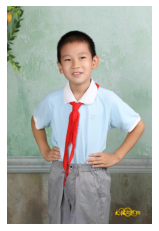

In [4]:
import matplotlib.pyplot as plt
path_to_boy = root / 'L03_documents' / "boy.jpg"
img = plt.imread(path_to_boy)  
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [6]:
type(img)

numpy.ndarray

(-0.5, 1199.5, 1199.5, -0.5)

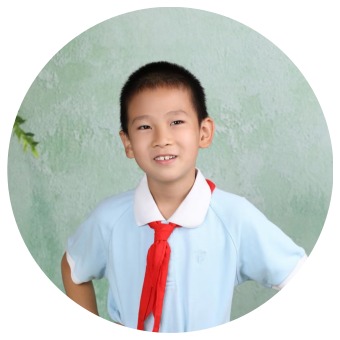

In [47]:
import matplotlib.patches as patches
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
im = ax.imshow(img[0:1200,:])
patch = patches.Circle((600, 600), radius = 600, transform = ax.transData)
im.set_clip_path(patch)
ax.axis('off')


In [51]:
fig.savefig("boy.png",dpi=300,bbox_inches="tight")

In [7]:
import cv2 as cv

img_cv = cv.imread("boy.jpg", 1) 
print(img_cv.shape)

(1800, 1200, 3)


In [8]:
type(img_cv)

numpy.ndarray

In [27]:
# 打开一个图片文件
cv.imshow("boy", img_cv)
cv.waitKey(0)

-1

In [52]:
img_boy = cv.imread("boy.png") 
print(img_boy.shape)

(1418, 1419, 3)


In [34]:
cv.imshow("boy", img_boy)
cv.waitKey(0)

-1